# Advertising Sales Channel Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Exploratory Data Analysis

In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Check the data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Getting information about data like as null value, dtypes, Columns

In [5]:
df.shape

(200, 5)

shows that there are 200 rows and 5 columns

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


checking statistical evaluation of all columns

In [7]:
df=df.drop(['Unnamed: 0'],axis=1)

Dropped this column because it wasn't related to our predictions

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null values are present 

In [10]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
TV,"[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 1...",190
radio,"[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19....",167
newspaper,"[69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11....",172
sales,"[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2,...",121


There are no categories present since it is a regression problem

## Data Visualization

<AxesSubplot:>

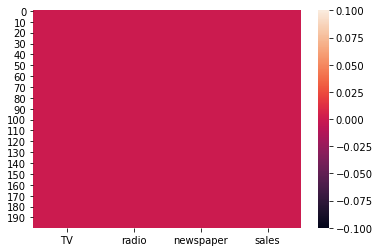

In [11]:
sns.heatmap(df.isnull())

Shows that there are no null values present

<AxesSubplot:>

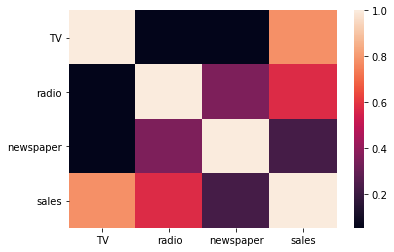

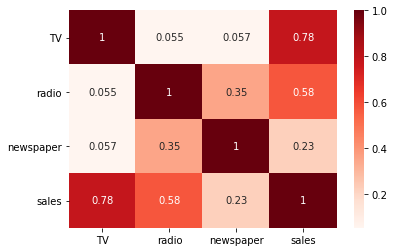

In [12]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Reds',annot=True)

Columns are highly related to each other

## Univariate Analysis

### Boxplot to show Outliers:

<AxesSubplot:>

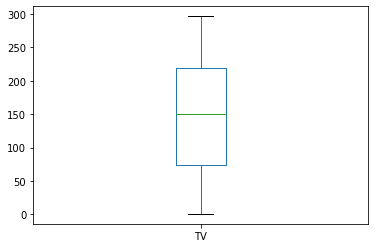

In [14]:
df['TV'].plot.box()

<AxesSubplot:>

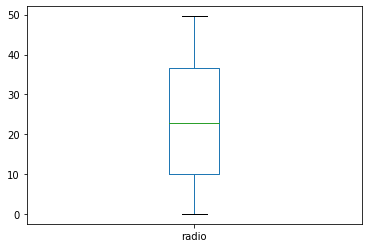

In [15]:
df['radio'].plot.box()

<AxesSubplot:>

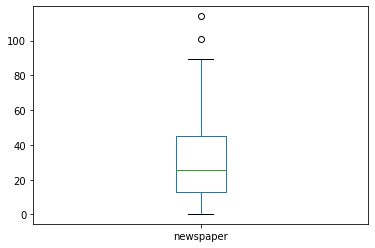

In [16]:
df['newspaper'].plot.box()

There are no outliers present in TV and radio.
There are outliers present in newspaper.

## Bivariate Analysis 

<AxesSubplot:xlabel='TV', ylabel='radio'>

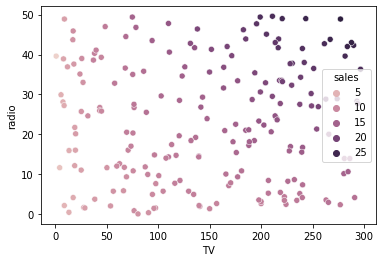

In [17]:
sns.scatterplot(data=df, x="TV", y="radio", hue="sales")

checking relationship between "TV" and "radio" columns and data is highly spreaded

<AxesSubplot:xlabel='TV', ylabel='sales'>

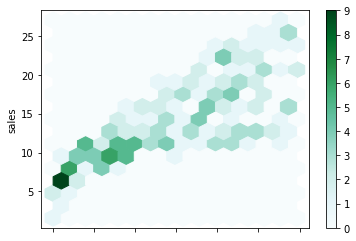

In [18]:
df.plot.hexbin(x='TV', y='sales', gridsize=15)

Checking relationship between "TV" and "sales" columns

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

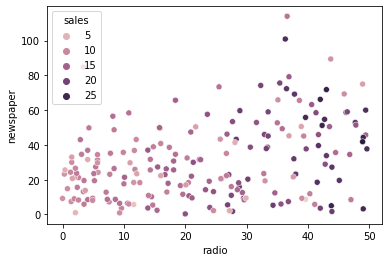

In [19]:
sns.scatterplot(data=df, x="radio", y="newspaper", hue="sales")

Checking relationship between "radio" and "newspaper" columns and the data is spreading

<AxesSubplot:xlabel='radio', ylabel='sales'>

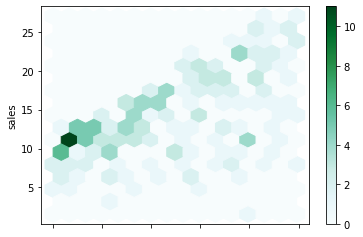

In [20]:
df.plot.hexbin(x='radio', y='sales', gridsize=15)

Checking relationship between "radio" and "sales" columns and the data is spreading

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

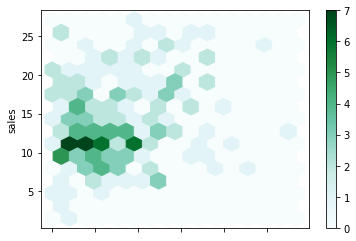

In [21]:
df.plot.hexbin(x='newspaper', y='sales', gridsize=15)

Checking relationship between "sales" and "newspaper" columns and the data is spreading

## Multivariate Analysis 

In [22]:
collist=df.columns.values
ncol=5
nrows=10

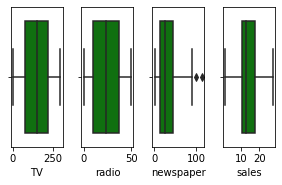

In [23]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()
    

Ploting all columns by Boxplot to find all variable outliers in a one place

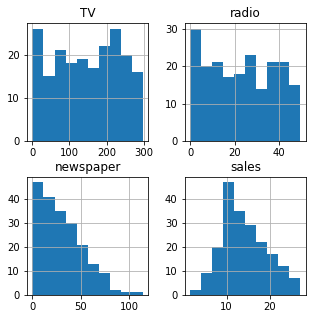

In [24]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

Ploting all columns in one place with the help of histplot

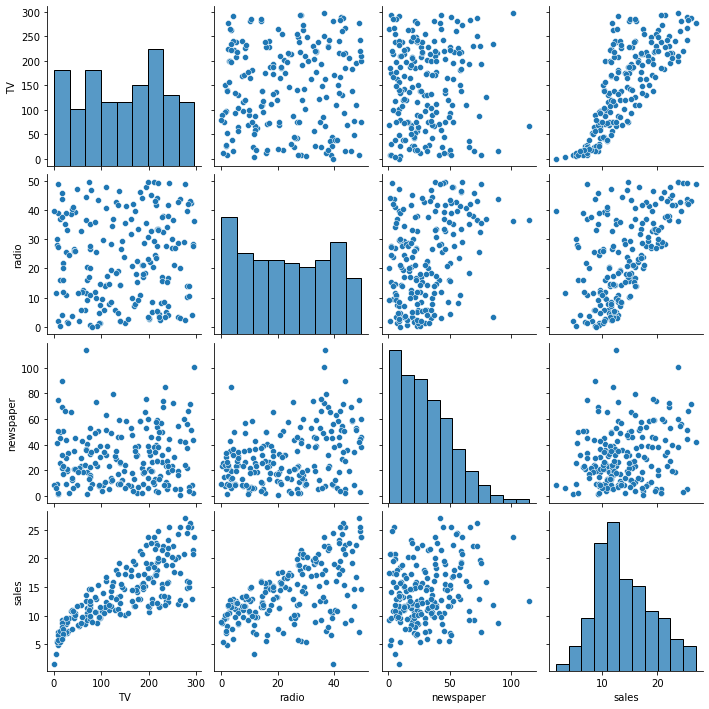

In [25]:
sns.pairplot(df)

## Z Score Value

In [26]:
from scipy.stats import zscore

In [27]:
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

Applying Zscore functionality on entire data to remove outliers

In [28]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


Setting threshold point

In [29]:
z[16][2]

3.8411707150992718

In [30]:
z[101][2]

3.238153957342154

Checking the value wether it is below threshold point or not

In [31]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


With the help of above functionality we are trying to get all the values that is below from threshold point

## Skewness

In [33]:
collist=df_new.columns.values
ncol=5
nrows=10

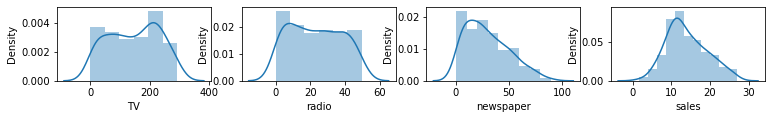

In [34]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(df_new[collist[i]])

In [35]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

All Variable already skewed

## Spliting All data into X and Y(Target Variable)

In [37]:
x=df_new.drop(['sales'],axis=1)
y=df_new['sales']

In [38]:
x.shape

(198, 3)

In [39]:
y.shape

(198,)

Checking shape after spliting x and y

## Spliting X and Y into Train data and Test data 

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

## Model Building

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [45]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
lr.intercept_

2.7570158021348004

In [47]:
lr.score(x_train,y_train)

0.8898152730900353

In [48]:
pred=lr.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [ 8.67797775 11.90420913 23.25102251  8.90519615 10.59167366 21.56367143
 19.13671596 11.46378131 13.93314849 17.45471969 14.14841912 20.85513868
  8.74122033 12.54847678  6.50129521  9.02344393 10.85201206 12.41646089
  9.72238377 11.3829014  13.16962408 16.85850009 22.90577939  6.09946233
 16.93217155 20.78593021  8.20247969 14.92838254  6.82797748 12.22477754
 17.71812741 13.51378872  6.45282814 14.38378573 15.37346135 17.90540789
 15.11864961 11.72864491 18.23911495 16.00438707 19.03494949 13.03023761
 11.7470536   9.29824781  6.26086364  7.51664599 16.98523902 16.0021104
 11.06933674 22.71691646 16.75096873 13.85809989 18.50474125  5.31347095
  4.54185396 12.28569049  9.63319576 21.54056584 13.7446564  10.73598152
 20.52627148  7.34012709 20.21626429  7.75233902 24.05462193 13.46631581]
Actual Price,y_test


In [49]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))


error:
Mean absolute error: 1.3528603338111884
Mean squared error: 3.0788950440726905
Root Mean Squared error: 1.7546780457031685
0.896322793751286


## Random Forest Regressor

In [51]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [52]:
rf.score(x_train,y_train)

0.9964812827779989

In [53]:
pred=rf.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')


Predicted Result Price: [ 8.905 13.02  23.44  10.703  5.715 23.603 19.417 12.847 15.285 14.649
 14.398 22.701  5.571 13.46   9.141 10.256  5.668 11.594 10.042 12.109
 12.909 17.677 24.239  7.193 17.171 21.991  8.015 12.183  7.649 12.704
 18.515 14.768  9.333 12.964 12.446 19.21  15.167 12.777 19.017 16.652
 21.29   6.073 13.043 11.081  7.964  7.831 17.623 16.251  9.088 25.231
 18.449 12.878 19.919  8.536  7.597 11.845 11.258 20.627 13.204 12.45
 22.055  9.443 21.313  9.394 25.51  12.046]
Actual Price,y_test


In [54]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))


error:
Mean absolute error: 0.5182575757575784
Mean squared error: 0.40431613636364055
Root Mean Squared error: 0.6358585820476441
0.9863852561196734


## Decision Tree Regressor

In [56]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred=dtc.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))


Predicted Result Price: [ 8.5 12.9 25.5  9.7  5.3 25.4 19.6 12.4 15.5 14.8 12.9 25.4  5.3 13.2
  8.7 10.6  5.3 11.4  9.6 11.8 14.  17.3 21.7  8.  17.4 21.7  8.  12.5
  8.  12.8 19.  15.   8.7 11.8 12.7 18.  15.6 12.8 19.4 16.6 23.2  5.3
 12.9 11.5  8.5  8.  18.5 17.4  8.8 27.  18.4 13.4 20.2  8.1  8.1 11.4
 11.  20.7 14.  14.1 21.7  9.6 22.1  9.5 25.5 11.7]
Actual Price,y_test
error:
Mean absolute error: 0.9000000000000001
Mean squared error: 1.2406060606060607
Root Mean Squared error: 1.1138249685682489
0.9582244381254645


## Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
Enr=ElasticNet(alpha=0.0001)
Enr.fit(x_train,y_train)
Enrpred=Enr.predict(x_test)
print(Enr.score(x_train,y_train))
Enr.coef_

0.8898152730895865


array([0.04460681, 0.18242045, 0.01286359])

In [61]:
print(cross_val_score(rf,x,y,cv=5).mean())


0.9754662435943674


In [62]:
dtcscore=cross_val_score(dtc,x,y,cv=5)
print(dtcscore)
print(dtcscore.mean(),dtcscore.std())


[0.95440275 0.95321859 0.94415669 0.92981891 0.97216849]
0.9507530858155746 0.013854748754675428


## Hyper parameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
model = RandomForestRegressor(random_state = 42)
parameters = {'bootstrap': [True],'criterion': ['mse'],'max_depth':[None],'max_features': ['auto'],'max_leaf_nodes': [None],
              'min_impurity_decrease': [0.0],'min_impurity_split': [None],'min_samples_leaf': [1],'min_samples_split': [2],
              'min_weight_fraction_leaf': [0.0],'n_estimators':[10],'n_jobs': [1],'oob_score': [False],'random_state': [42],'verbose': [0],'warm_start': [False]}

grid = GridSearchCV(model,parameters, cv=None)
grid.fit(x_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(x_test) - y_test) ** 2))


r2 / variance :  0.9399226851455029
Residual sum of squares: 0.46


## Saving the model

In [67]:
import joblib
joblib.dump(rf,'SalesPred.obj')

['SalesPred.obj']